In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

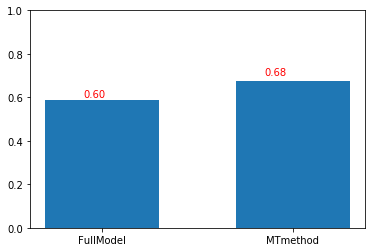

In [3]:
labels = ['FullModel', 'MTmethod']
values = [0.5867, 0.6751]
plt.figure()
plt.ylim(0, 1)
plt.bar(labels, values, width=.6)
plt.text(-.1, 0.6, '0.60', color='r')
plt.text(0.85, 0.7, '0.68', color='r')
plt.show()

In [6]:
df = pd.read_csv("../data/Davis.csv", index_col='Unnamed: 0')
# 訓練データとテストデータに分割
df = df.drop(['sex', 'repwt', 'repht'], axis=1)
df.head()

,weight,height
1,77,182
2,58,161
3,53,161
4,68,177
5,59,157


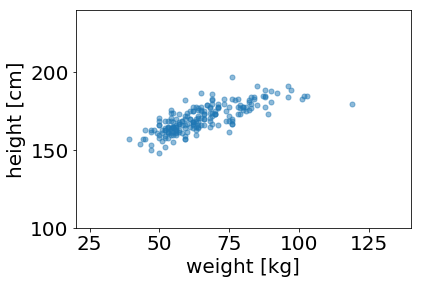

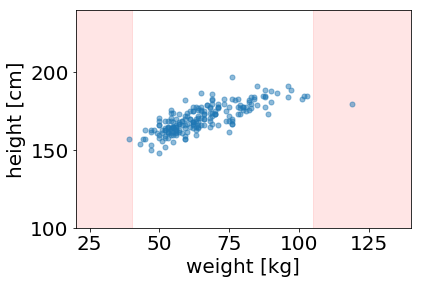

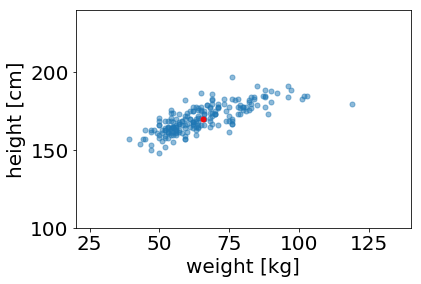

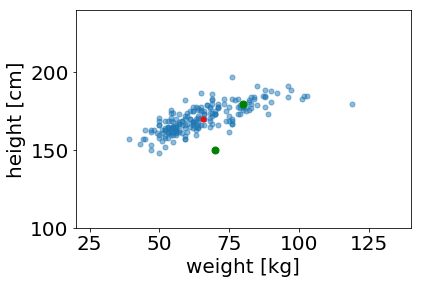

In [14]:
plt.rcParams.update({'font.size': 20})

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
# plt.plot(*df.mean(), '*', color='r', ms=10, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
# plt.vlines(100, 0, 300, color='r', linestyle='dashed', linewidth=1.5)


l_x, l_y = [105, 105, 200, 200], [0, 300, 300, 0]
u_x, u_y = [40, 40, 0, 0], [0, 300, 300, 0]
plt.fill(l_x, l_y, color="r",alpha=0.1)
plt.fill(u_x, u_y, color="r",alpha=0.1)
# plt.plot(*df.mean(), '*', color='r', ms=10, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
plt.plot(*df.mean(), 'o', color='r', ms=5, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
plt.plot(*df.mean(), 'o', color='r', ms=5, alpha=.9)
plt.Circle((65.8, 170), 50, fc="r")
plt.plot([80, 70], [180, 150], 'o', color='g', ms=7, alpha=1.0)
plt.show()

In [13]:
df.mean()

weight     65.80
height    170.02
dtype: float64

# Iris Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
def MT(X_train, X_test, y_test):
    # 標準化
    sc = StandardScaler()
    X_std = sc.fit_transform(X_train)
    
    # 標準化したXの相関係数行列
    X_std_corr = np.corrcoef(X_std, rowvar=False)
    
    # 逆行列の計算
    X_std_corr_inv = np.linalg.inv(X_std_corr) 
    
    # テスト
    X_test_std = sc.transform(X_test)
    X_test_dist = np.array([np.dot(x, np.dot(X_std_corr_inv, x)) for x in X_test_std])/X_test.shape[1]

    return X_test_dist

In [9]:
def break_even(a, y_test):
    y_test.reset_index(drop=True, inplace=True) # インデックスリセット
    idx = a.argsort()[::-1] # 降順のインデックス計算

    n_total = len(y_test)
    n_anom = sum(y_test)
    n_norm = n_total - n_anom
    coverage = np.zeros(n_total) # 異常網羅率
    detection = np.zeros(n_total) # 正答率
    for i in range(n_total):
        n_detected_anom = sum(y_test[idx][:i])
        n_detected_norm = n_total - i - sum(y_test[idx][i:])
        coverage[i] = n_detected_anom / n_anom
        detection[i] = n_detected_norm / n_norm

    # プロット
    plt.plot(a[idx], coverage, label='coverage')
    plt.plot(a[idx], detection, label='detection ratio')
    plt.xlabel('threshold')
    plt.xscale('log')
    # plt.grid(which='major',color='black',linestyle='-')
    # plt.grid(which='minor',color='black',linestyle='-')
    plt.grid(which='major')
    plt.grid(which='minor')
    plt.legend()
    plt.show()

In [10]:
# ファイル読み込み
in_file = '../data/iris.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=',')
df = df.sample(frac=1)
df = df.reset_index(drop=True)

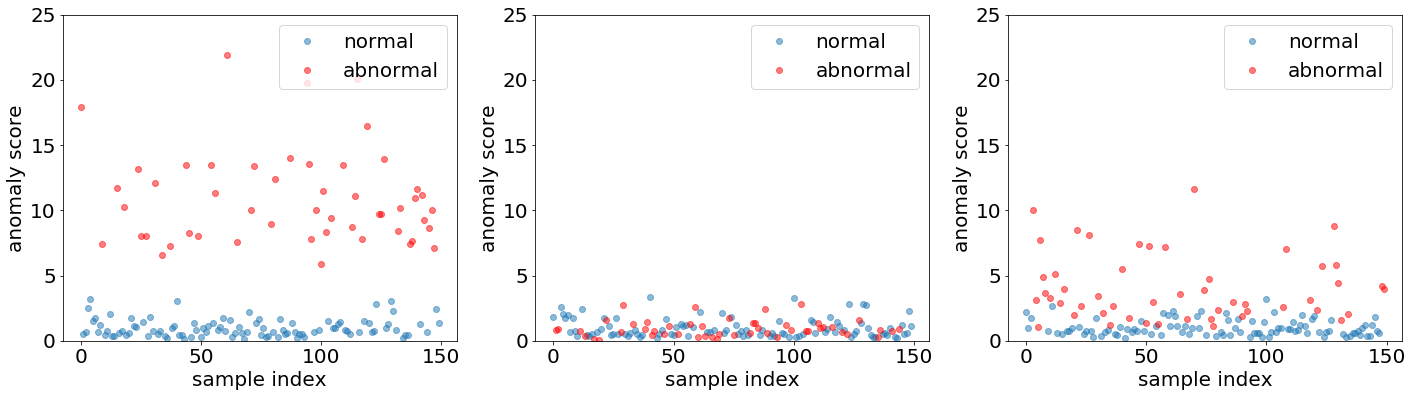

In [11]:
plt.figure(figsize=(24, 6))

for i, target in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    # 異常度計算
    target_col = 'class'
    df_nontarget = df[df[target_col]!=target]
    X_train = df_nontarget.drop(target_col, axis=1)
    y_train = (df_nontarget[target_col]!=target).astype(np.int32)
    X_test = df.drop(target_col, axis=1)
    y_test = (df[target_col]==target).astype(np.int32)
    a = MT(X_train, X_test, y_test)
    
    # 描画
    plt.subplot(1, 3, i+1)
    plt.rcParams.update({'font.size': 20})
    plt.ylim(0, 25)
    plt.locator_params(axis='y',nbins=6)
    plt.xlabel('sample index')
    plt.ylabel('anomaly score')
    plt.plot(np.where(y_test==0)[0], a[np.where(y_test==0)[0]], 'o', alpha=.5, label='normal')
    plt.plot(np.where(y_test!=0)[0], a[np.where(y_test!=0)[0]], 'o', color='r',  alpha=.5, label='abnormal')
    plt.legend(loc=1)

plt.show()

3.1967044182965054 1.0 1.0
0.7754914979751645 0.54 0.54
1.67241962736027 0.84 0.84


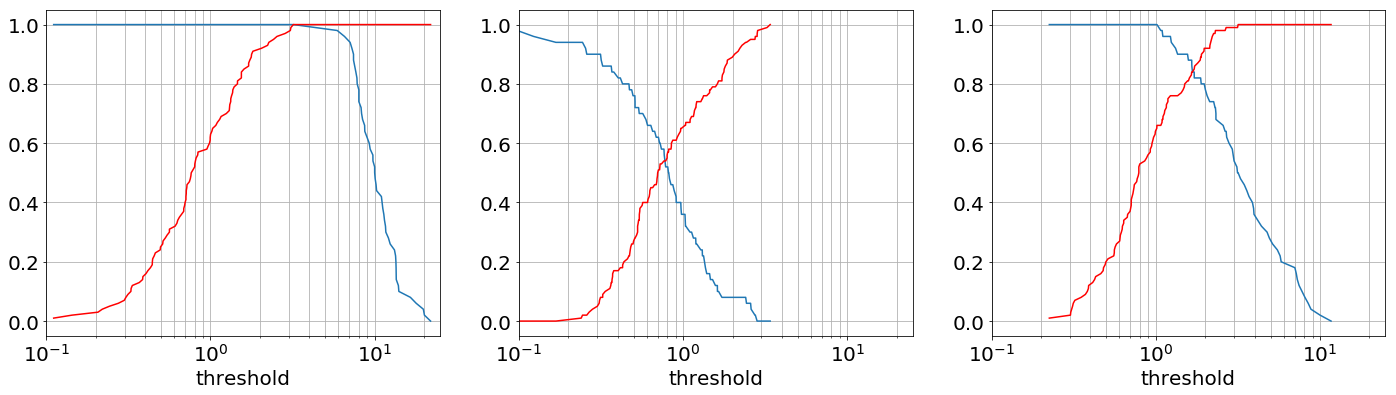

In [12]:
plt.figure(figsize=(24, 6))

for i, target in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    # 異常度計算
    target_col = 'class'
    df_nontarget = df[df[target_col]!=target]
    X_train = df_nontarget.drop(target_col, axis=1)
    y_train = (df_nontarget[target_col]!=target).astype(np.int32)
    X_test = df.drop(target_col, axis=1)
    y_test = (df[target_col]==target).astype(np.int32)
    a = MT(X_train, X_test, y_test)
    
    # 描画
    plt.subplot(1, 3, i+1)
    
    # 性能分岐点の計算 
    y_test.reset_index(drop=True, inplace=True) # インデックスリセット
    idx = a.argsort()[::-1] # 降順のインデックス計算
    n_total = len(y_test)
    n_anom = sum(y_test)
    n_norm = n_total - n_anom
    coverage = [sum(y_test[idx][:i]) / n_anom for i in range(n_total)] # 異常標本精度
    detection = [(n_total - i - sum(y_test[idx][i:])) / n_norm for i in range(n_total)] # 正常標本精度
    
    thresh = 0
    
    for i, (c, d) in enumerate(zip(coverage, detection)):
        if c >= d:
            thresh = i
            break
    break_even_point = a[idx][thresh]
    print(break_even_point, c, d)
            
    # プロット
    plt.plot(a[idx], coverage, label='coverage')
    plt.plot(a[idx], detection, label='detection ratio', color='r')
    plt.xlabel('threshold')
    plt.xscale('log')
    plt.grid(which='major')
    plt.grid(which='minor')
    plt.xlim(0.1, 25)
    # plt.legend(loc=4)
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    # plt.text(x_max-0.6*x_max, y_max-0.4*y_max, 'break-even point: {:.1f}'.format(a[idx][thresh]))

plt.show()